**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Clone and Install

**NOTE:** YOLOv9 is very new. At the moment, we recommend using a fork of the main repository. The `detect.py` script contains a bug that prevents inference. This bug is patched in the fork.

In [ ]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Total 325 (delta 0), reused 0 (delta 0), pack-reused 325
Receiving objects: 100% (325/325), 2.25 MiB | 38.39 MiB/s, done.
Resolving deltas: 100% (164/164), done.
/content/yolov9
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 58.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 57.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 61.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 91.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━

**NOTE:** Let's install additional packages that will be useful later on.

In [ ]:
!pip install -q roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.4 MB/s eta 0:00:00


## Imports

In [ ]:
import roboflow

from IPython.display import Image

## Download model weights

**NOTE:** In the YOLOv9 paper, versions yolov9-s and yolov9-m are also mentioned, but the weights for these models are not yet available in the YOLOv9 repository.

In [ ]:
!mkdir -p {HOME}/weights

In [ ]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [ ]:
!ls -la {HOME}/weights

total 402440
drwxr-xr-x 2 root root      4096 Apr  3 09:34 .
drwxr-xr-x 1 root root      4096 Apr  3 09:34 ..
-rw-r--r-- 1 root root  51508261 Feb 18 12:36 gelan-c.pt
-rw-r--r-- 1 root root 117203713 Feb 18 12:36 gelan-e.pt
-rw-r--r-- 1 root root 103153312 Feb 18 12:36 yolov9-c.pt
-rw-r--r-- 1 root root 140217688 Feb 18 12:36 yolov9-e.pt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Download example data

In [ ]:
!mkdir -p {HOME}/data

In [ ]:
SOURCE_IMAGE_PATH = "/content/highway.jpeg"

## Detection with pre-trained COCO model

### gelan-c

In [ ]:
!python detect.py --weights {HOME}/weights/gelan-c.pt --conf 0.1 --source /content/highway.jpeg --device 0

detect: weights=['/content/weights/gelan-c.pt'], source=/content/ave-0048-0022.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 467 layers, 25472640 parameters, 0 gradients, 102.8 GFLOPs
image 1/1 /content/ave-0048-0022.jpg: 384x640 (no detections), 131.4ms
Speed: 0.4ms pre-process, 131.4ms inference, 34.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp4


**NOTE:** By default, the results of each subsequent inference sessions are saved in `{HOME}/yolov9/runs/detect/`, in directories named `exp`, `exp2`, `exp3`, ... You can override this behavior by using the `--name` parameter.

In [ ]:
Image(filename=f"{HOME}/yolov9/runs/detect/exp/highway.jpeg", width=600)

ValueError: Cannot embed the '/content/yolov9/runs/detect/exp2/' image format

## yolov9-e

In [ ]:
!python detect.py --weights {HOME}/weights/yolov9-e.pt --conf 0.1 --source /content/highway.jpeg.jpg  --device 0

detect: weights=['/content/weights/yolov9-e.pt'], source=/content/ave-0048-0022.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 1119 layers, 69470144 parameters, 0 gradients, 244.0 GFLOPs
image 1/1 /content/ave-0048-0022.jpg: 384x640 1 broccoli, 161.7ms
Speed: 0.4ms pre-process, 161.7ms inference, 687.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp5


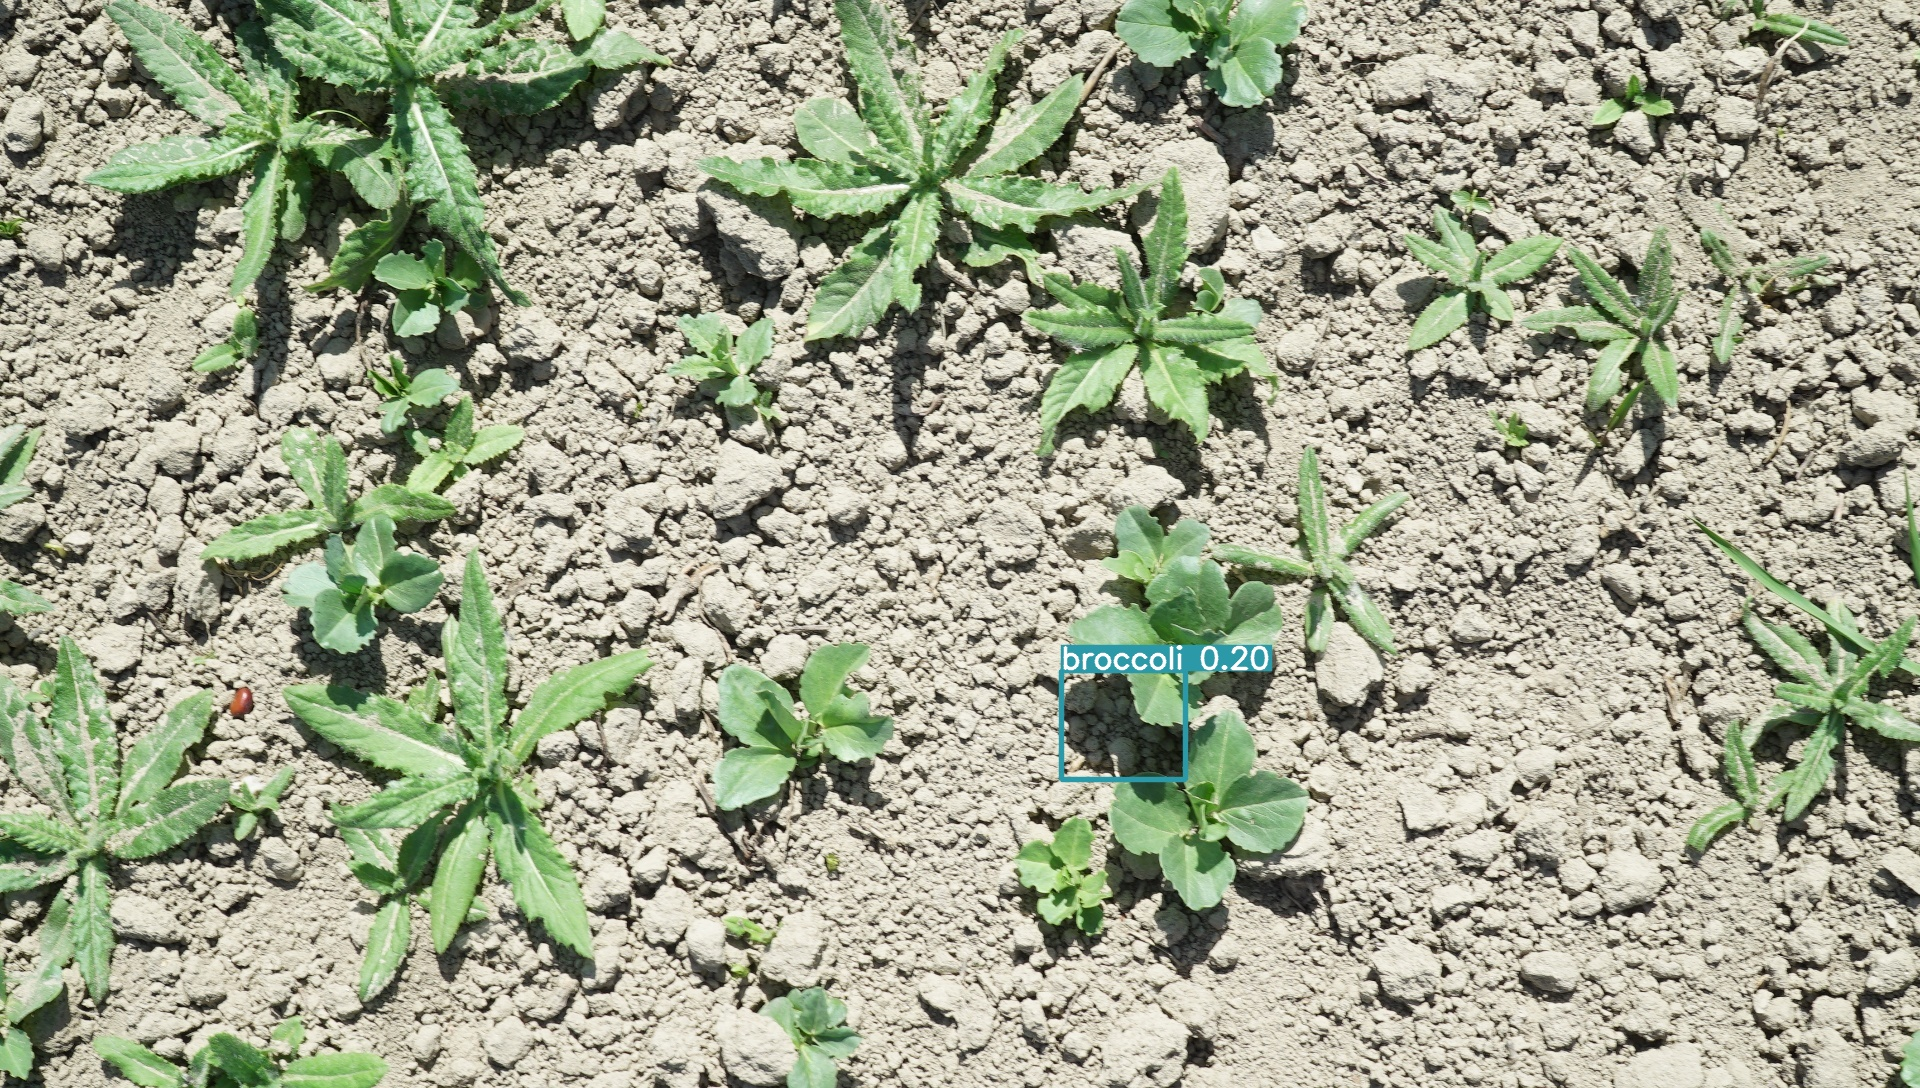

In [ ]:
Image(filename=f"{HOME}/yolov9/runs/detect/exp3/highway.jpeg", width=600)

## Authenticate and Download the Dataset

**NOTE:** The dataset must be saved inside the `{HOME}/yolov9` directory, otherwise, the training will not succeed.

In [ ]:
%cd {HOME}/yolov9

# !pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="2NH5iKQFhKMK16h7fAY1")
project = rf.workspace("keerthana-n-16wt0").project("yolov8-custom-obj-detect-yt-cufhr")
version = project.version(2)
dataset = version.download("yolov9")


/content/yolov9
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to yolov8-custom-obj-detect-yt-2 in yolov9:: 100%|██████████| 1532/1532 [00:00<00:00, 2979.98it/s]


## Train Custom Model

In [ ]:
# import torch

# def custom_data_loader(data_list):
#     # ... (Your custom data loading logic here)
#     # Convert data to tensors before returning
#     tensors = [torch.from_numpy(item) for item in data_list]
#     return tensors

# # Assuming your data is in a list called `data_list`
# train_data = custom_data_loader(data_list)  # Get tensors


In [ ]:
%cd {HOME}/yolov9

!python train_dual.py \
--batch 8 --epochs 20 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data {dataset.location}/data.yaml \
--weights {HOME}/weights/yolov9-c.pt \
--cfg models/detect/yolov9-c.yaml \
--hyp hyp.scratch-high.yaml

/content/yolov9
2024-04-03 10:14:41.895493: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-03 10:14:41.895546: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-03 10:14:41.897027: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-03 10:14:43.063623: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train_dual: weights=/content/weights/yolov9-c.pt, cfg=models/detect/yolov9-c.yaml, data=/content/yolov9/yolov8-custom-obj-detect-yt-2/data.yaml, hyp=hyp.scratch-high.yaml, epochs=10, batch_size=8, imgsz=640, rect=False, resum

## Examine Training Results

**NOTE:** By default, the results of each subsequent training sessions are saved in `{HOME}/yolov9/runs/train/`, in directories named `exp`, `exp2`, `exp3`, ... You can override this behavior by using the `--name` parameter.

In [ ]:
!ls {HOME}/yolov9/runs/train/exp2/

confusion_matrix.png				     PR_curve.png	    val_batch0_pred.jpg
events.out.tfevents.1712139283.1cb250653196.13584.0  R_curve.png	    val_batch1_labels.jpg
F1_curve.png					     results.csv	    val_batch1_pred.jpg
hyp.yaml					     results.png	    val_batch2_labels.jpg
labels_correlogram.jpg				     train_batch0.jpg	    val_batch2_pred.jpg
labels.jpg					     train_batch1.jpg	    weights
opt.yaml					     train_batch2.jpg
P_curve.png					     val_batch0_labels.jpg


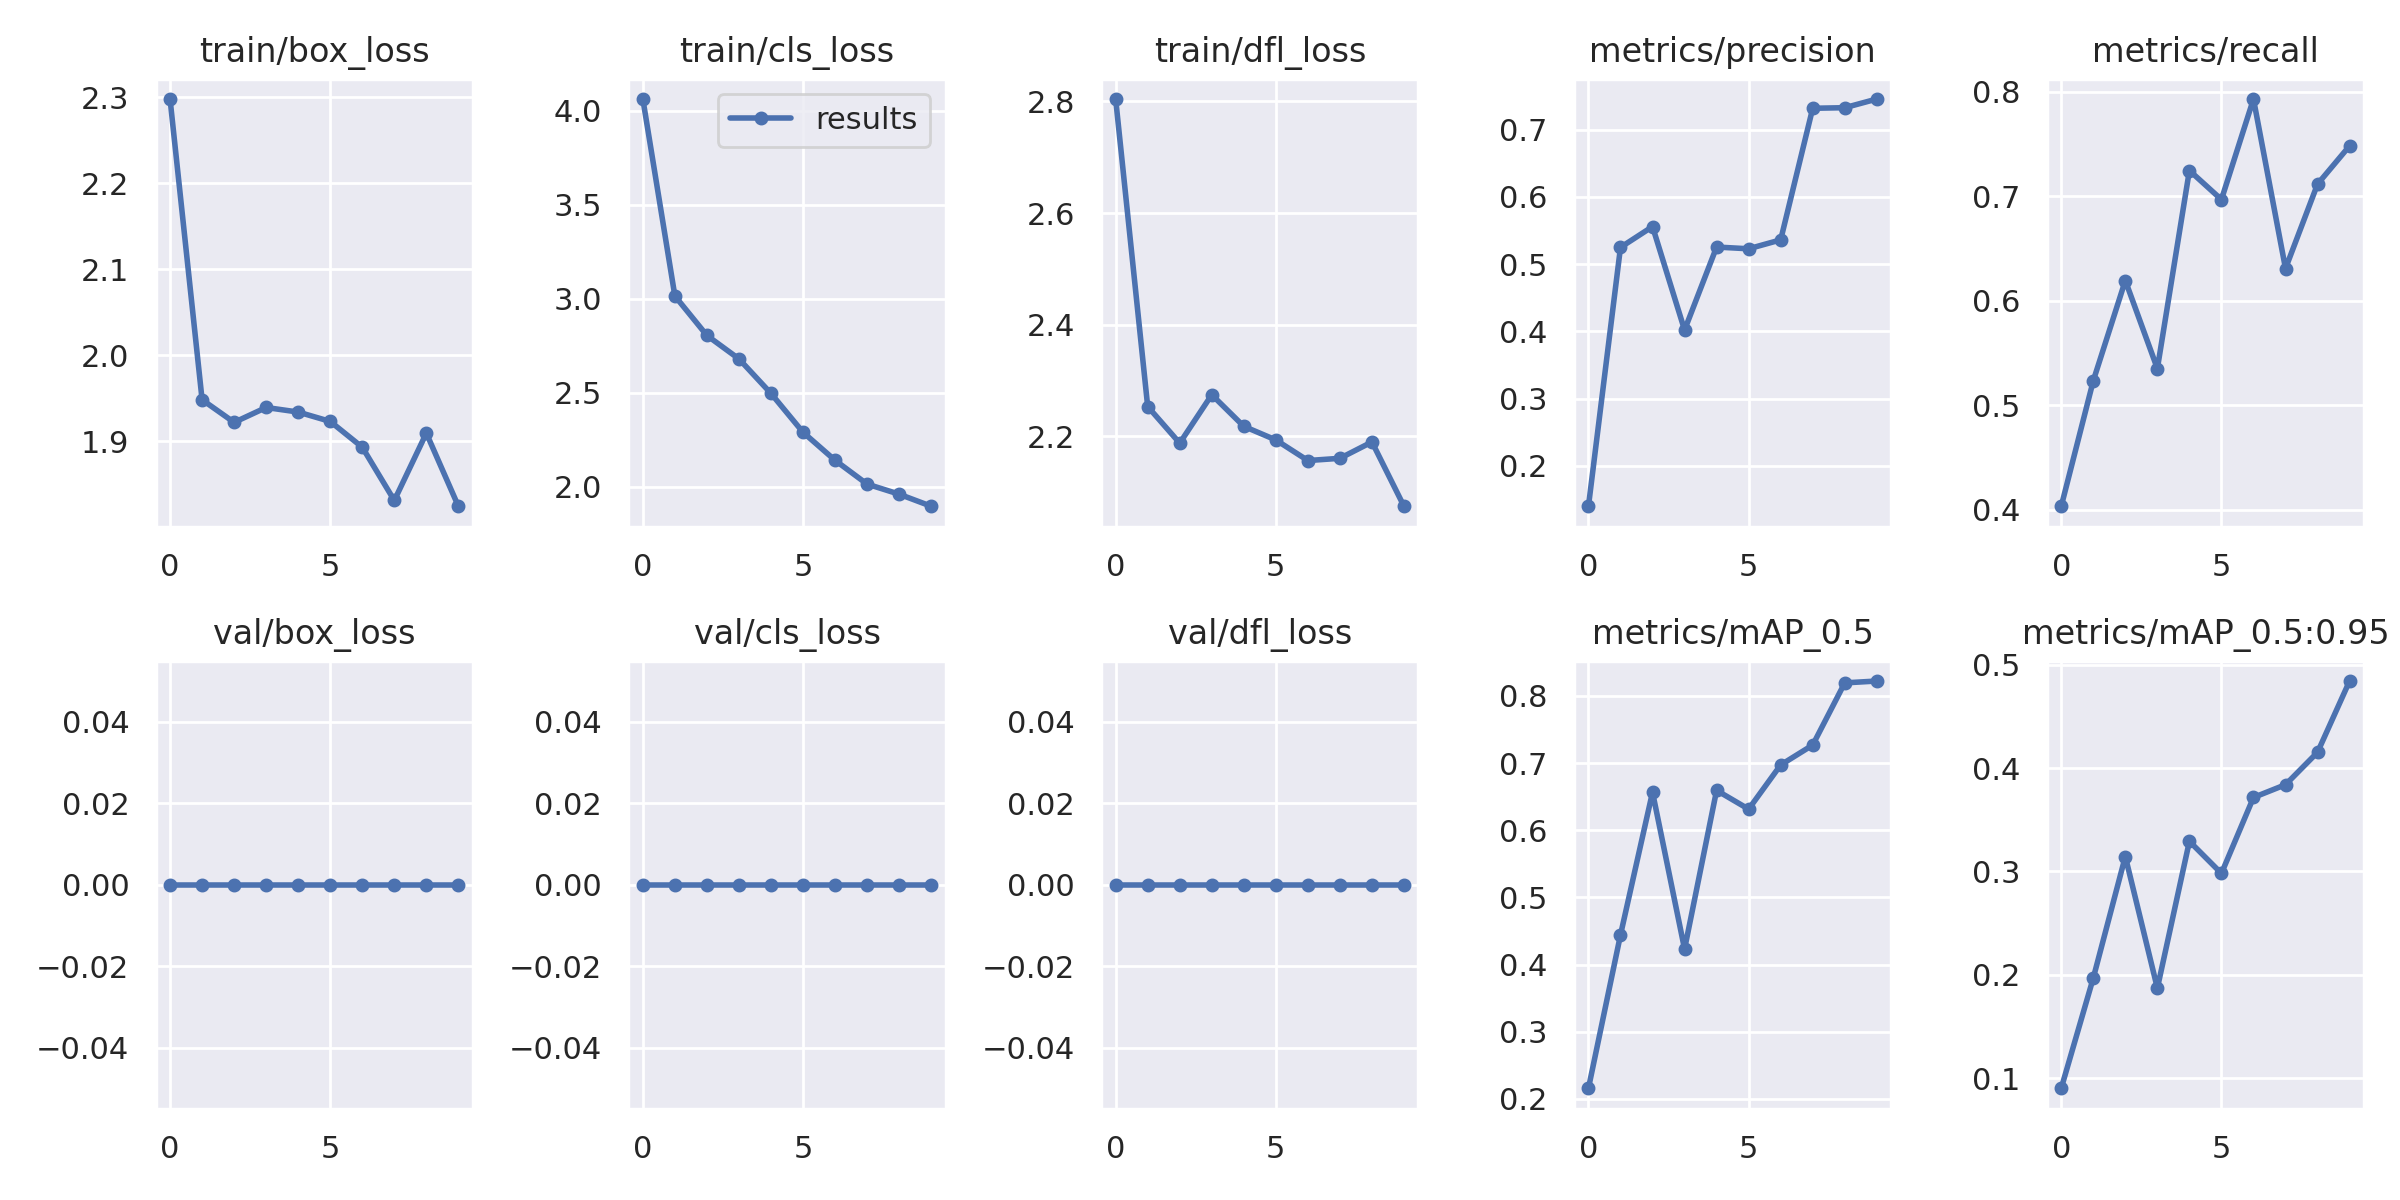

In [ ]:
Image(filename=f"{HOME}/yolov9/runs/train/exp/results.png", width=1000)

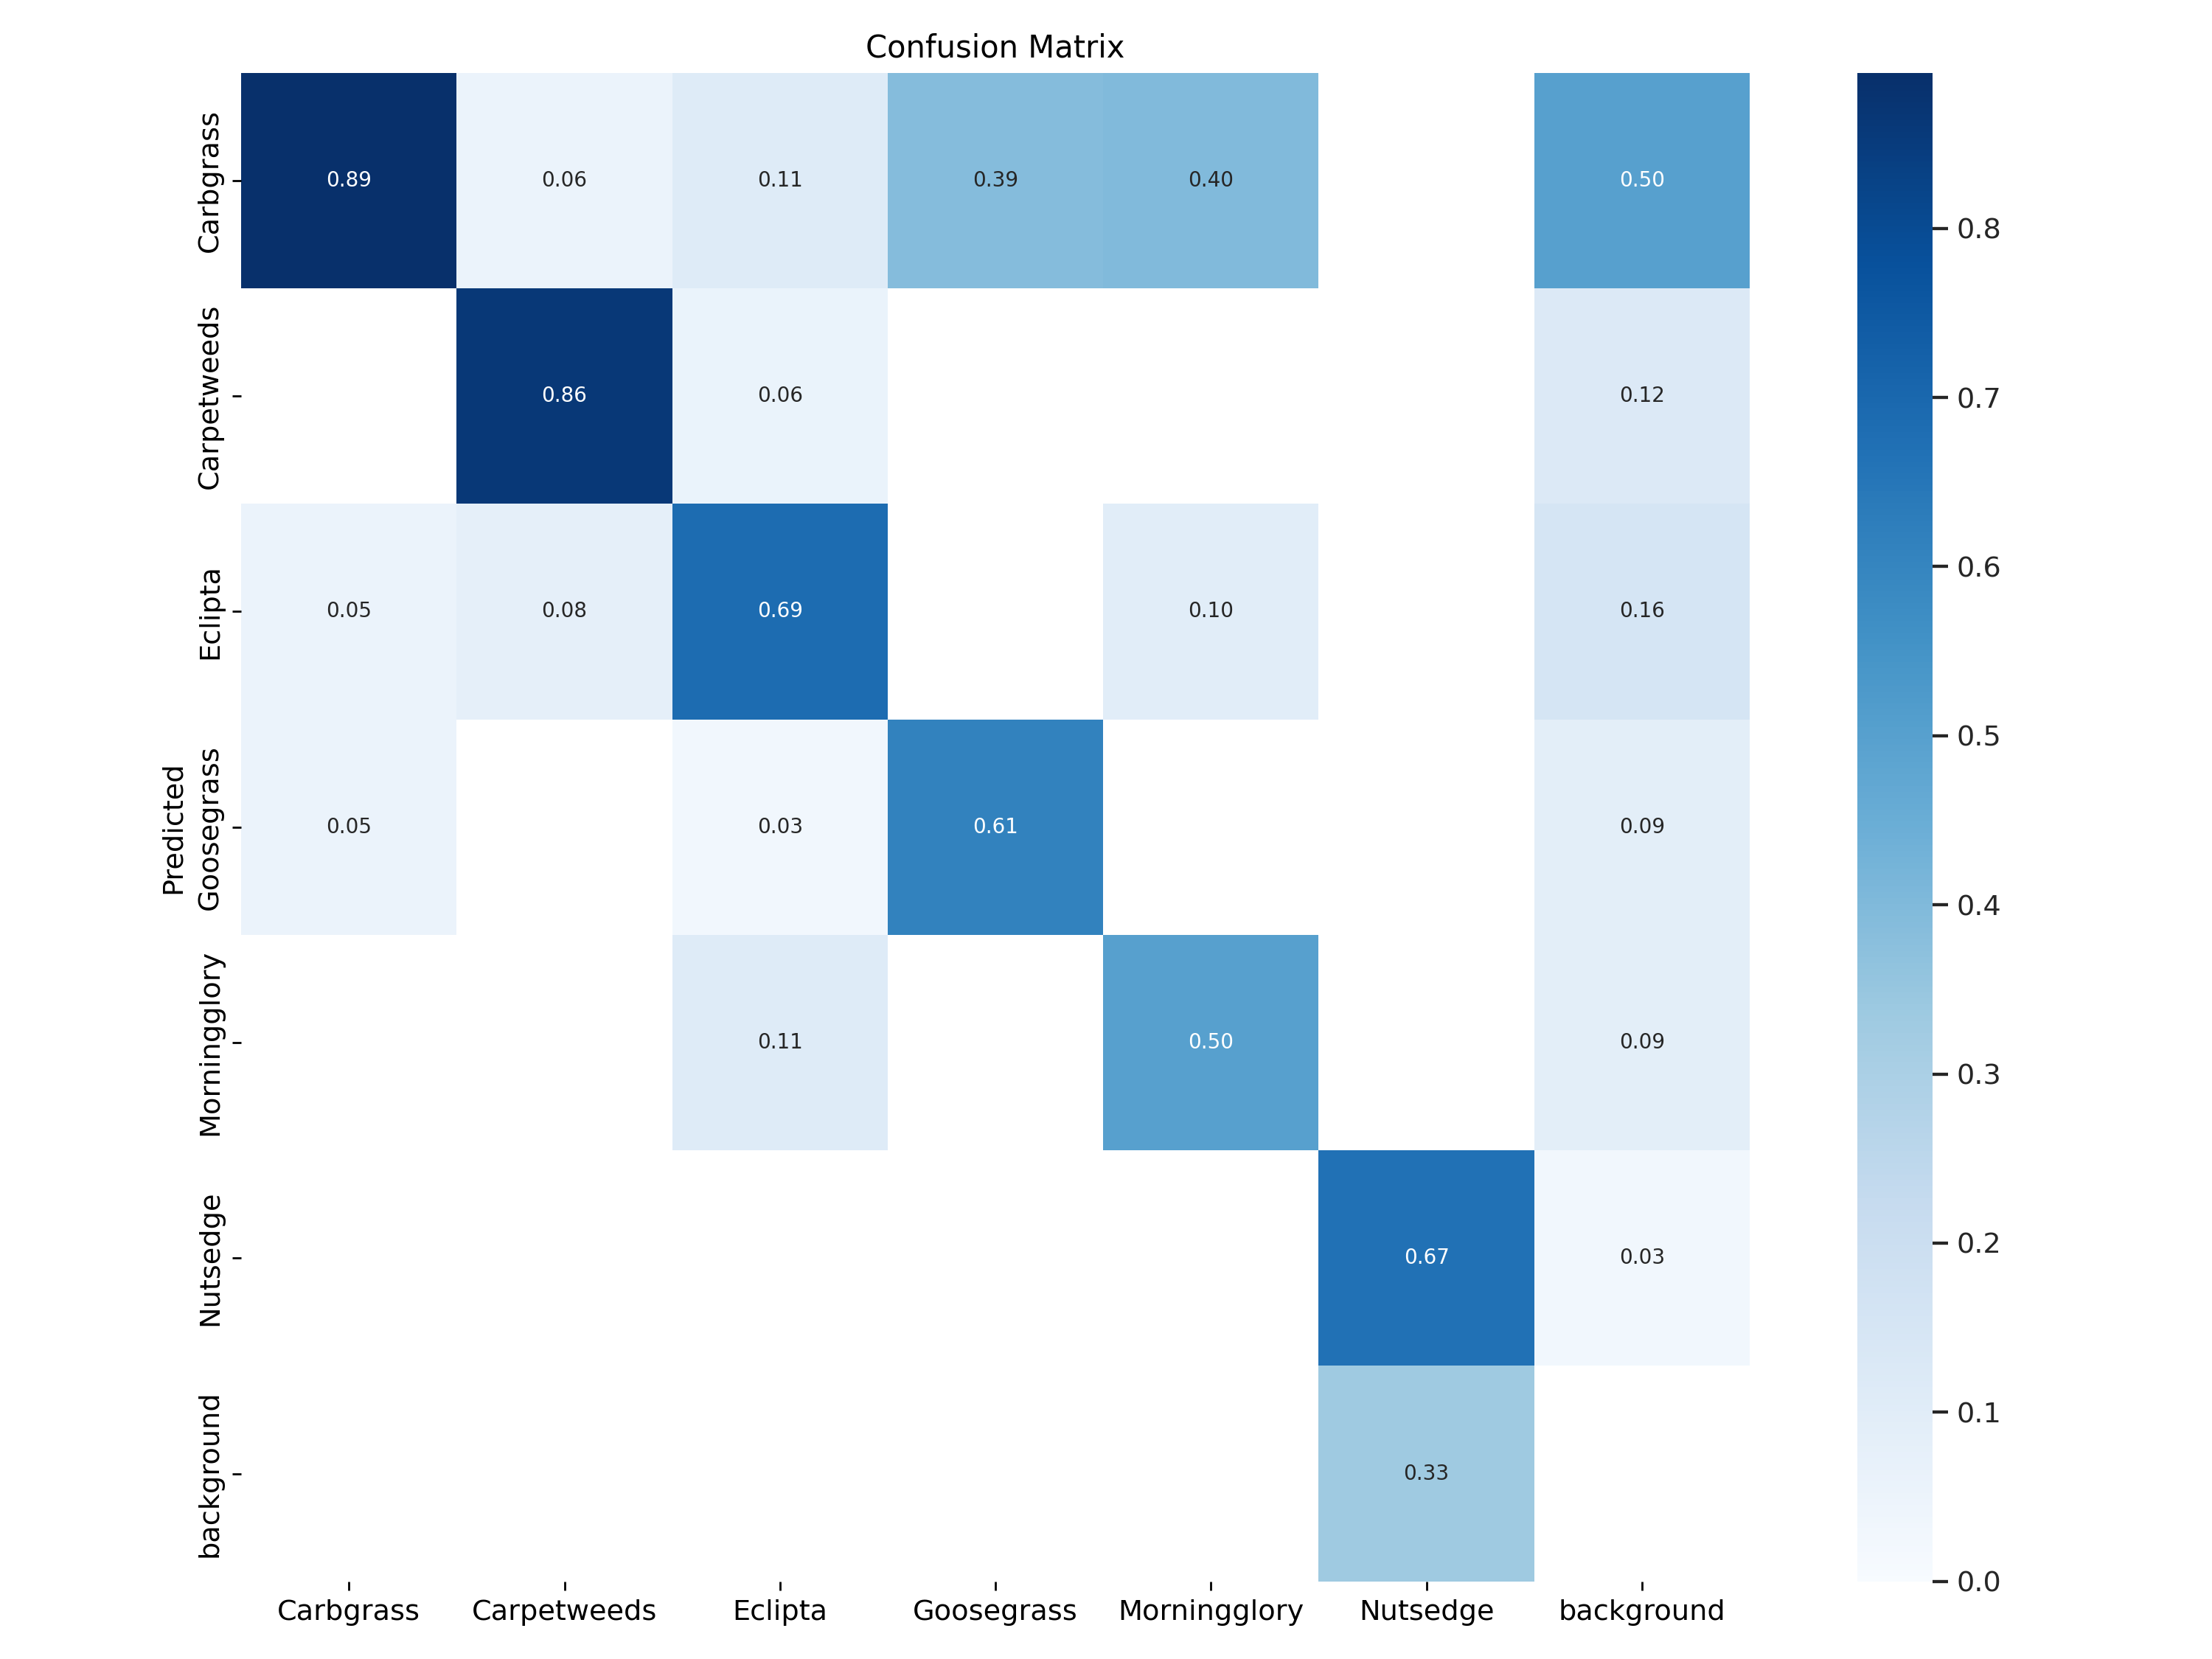

In [ ]:
Image(filename=f"{HOME}/yolov9/runs/train/exp/confusion_matrix.png", width=1000)

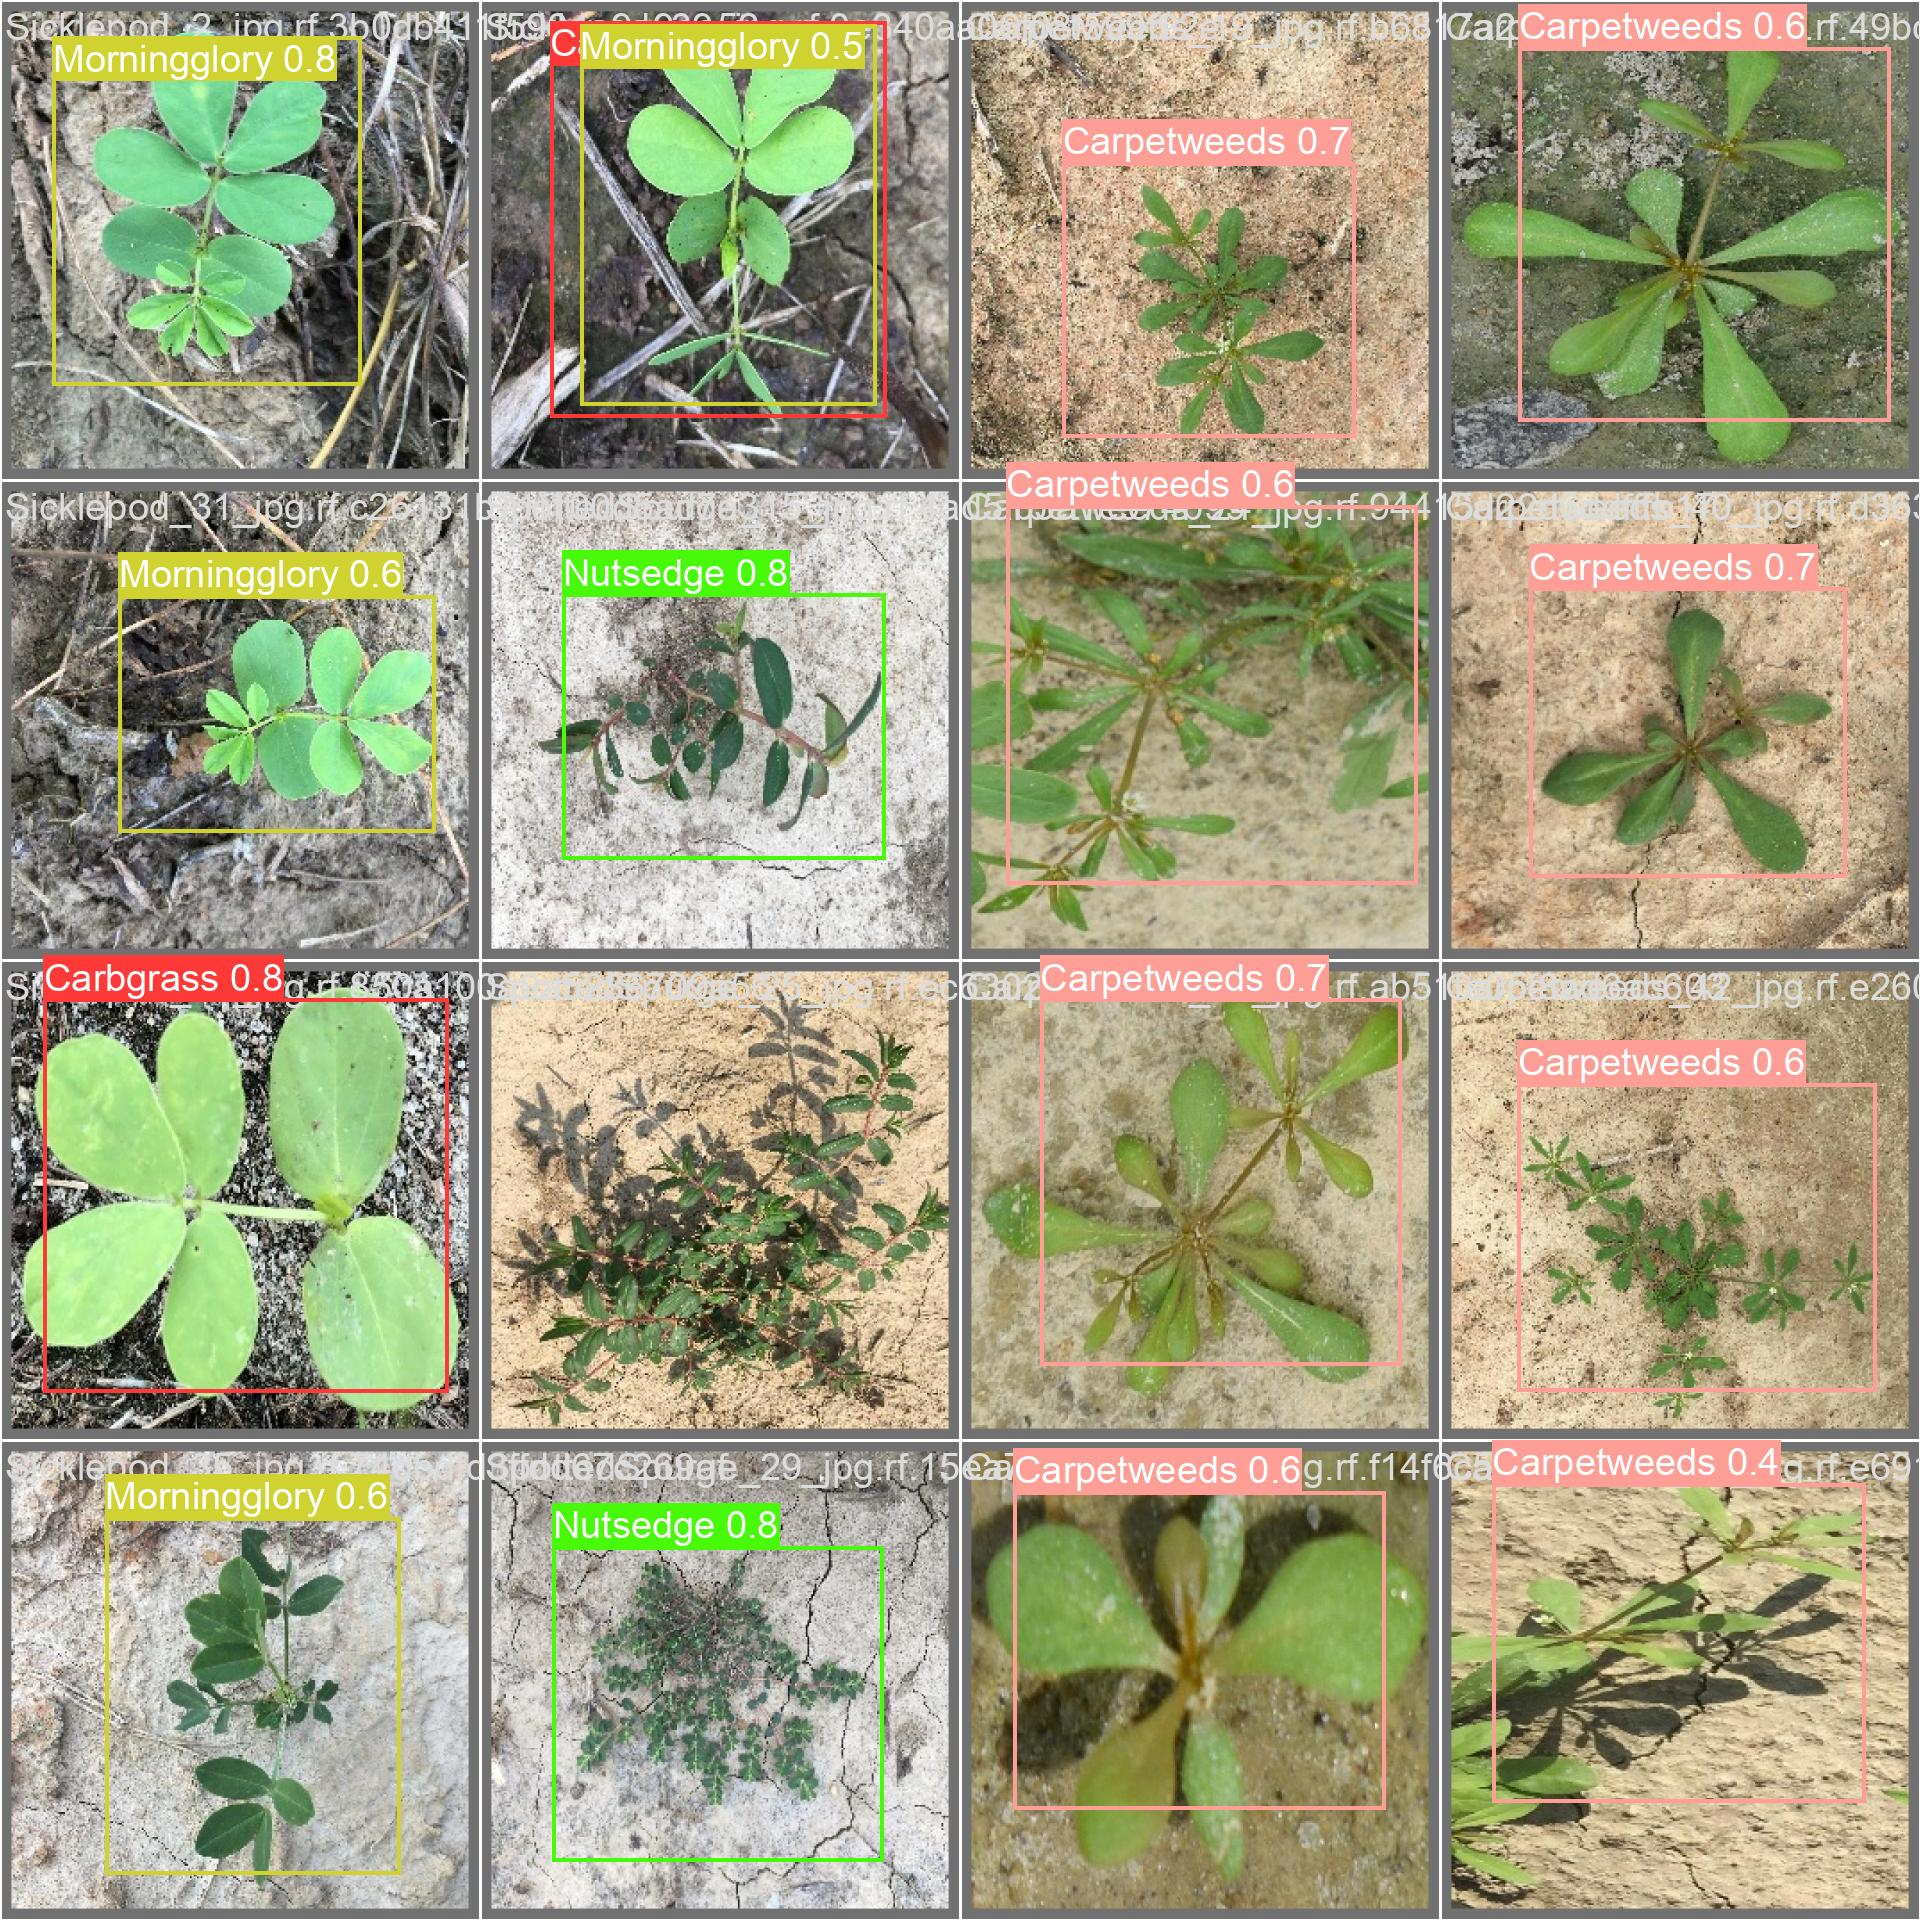

In [ ]:
Image(filename=f"{HOME}/yolov9/runs/train/exp/val_batch0_pred.jpg", width=1000)

## Validate Custom Model

In [ ]:
%cd {HOME}/yolov9

!python val_dual.py \
--img 640 --batch 8 --conf 0.001 --iou 0.7 --device 0 \
--data {dataset.location}/data.yaml \
--weights {HOME}/yolov9/runs/train/exp/weights/best.pt

/content/yolov9
val_dual: data=/content/yolov9/yolov8-custom-obj-detect-yt-2/data.yaml, weights=['/content/yolov9/runs/train/exp2/weights/best.pt'], batch_size=8, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
yolov9-c summary: 724 layers, 50970180 parameters, 0 gradients, 237.7 GFLOPs
val: Scanning /content/yolov9/yolov8-custom-obj-detect-yt-2/valid/labels.cache... 152 images, 0 backgrounds, 0 corrupt: 100% 152/152 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 19/19 [00:12<00:00,  1.47it/s]
                   all        152        152      0.745      0.749      0.822      0.484
             C

## Inference with Custom Model

In [ ]:
!python detect.py \
--img 640 --conf 0.1 --device 0 \
--weights {HOME}/yolov9/runs/train/exp/weights/best.pt \
--source {dataset.location}/valid/images

detect: weights=['/content/yolov9/runs/train/exp2/weights/best.pt'], source=/content/yolov9/yolov8-custom-obj-detect-yt-2/valid/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
yolov9-c summary: 724 layers, 50970180 parameters, 0 gradients, 237.7 GFLOPs
image 1/152 /content/yolov9/yolov8-custom-obj-detect-yt-2/valid/images/Carpetweeds_19_jpg.rf.b6817a292dfb0584051579136fb33325.jpg: 640x640 1 Carpetweeds, 102.5ms
image 2/152 /content/yolov9/yolov8-custom-obj-detect-yt-2/valid/images/Carpetweeds_24_jpg.rf.94415d22d6ddfffb17fe2606b66db8bb.jpg: 64

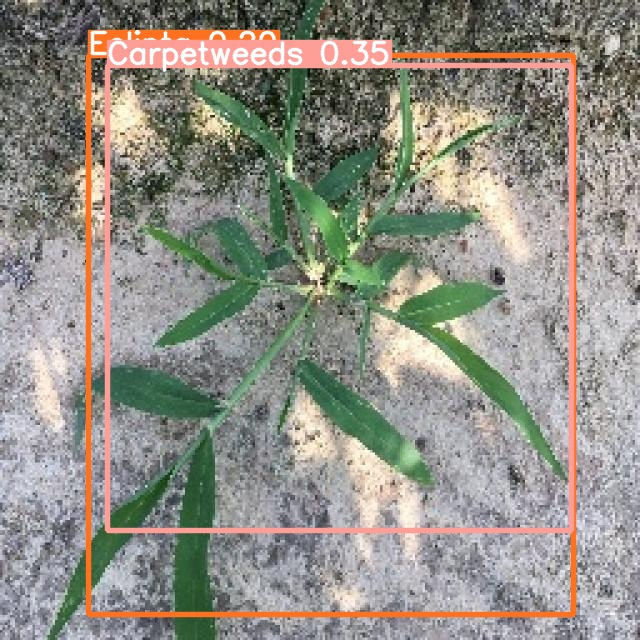

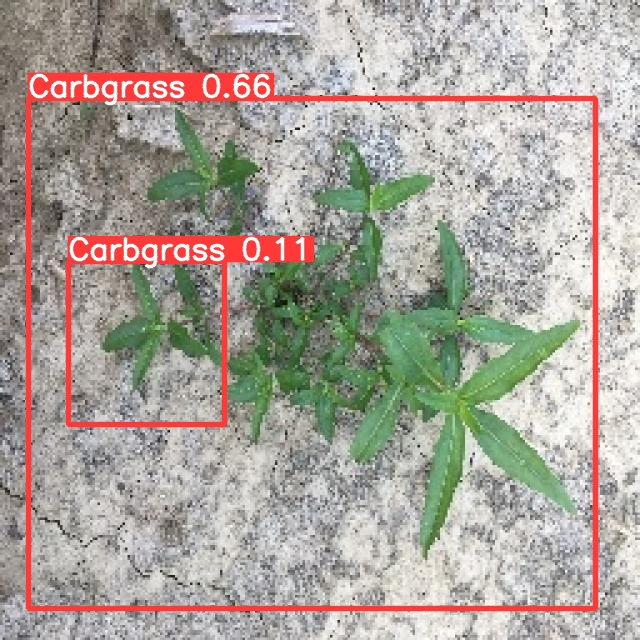

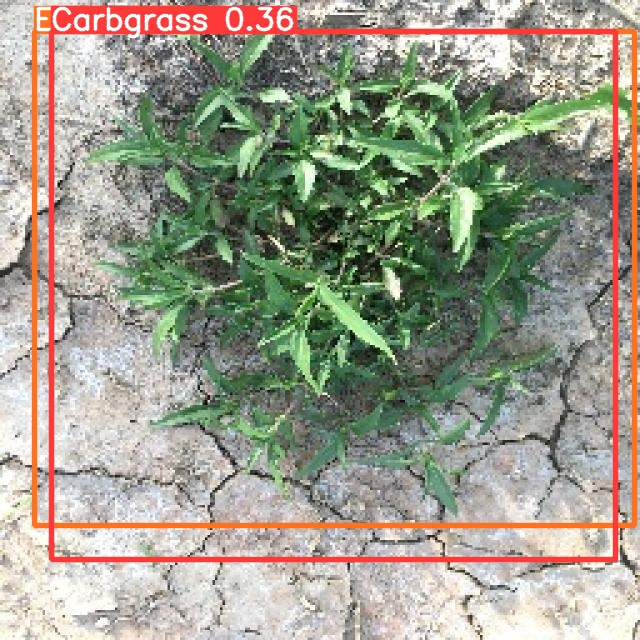

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/yolov9/runs/detect/exp6/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
import torch

# Assuming your model is defined in a variable named 'model'

# Save the state dictionary
torch.save(model.state_dict(), "")